# Multiple Linear Regression (MLR)

_**Regression models**_ are used to describe relationships between variables by fitting a line to the observed data. Regression allows you to estimate how a dependent variable (_y_) changes as the independent variable(s) (_x_) change.

_**Multiple linear regression**_ is used to estimate the relationship between _**two or more independent variables**_ and _**one dependent variable**_. You can use multiple linear regression when you want to know:
1. How strong the relationship is between two or more independent variables and one dependent variable (e.g. how rainfall, temperature, and amount of fertilizer added affect crop growth).
2. The value of the dependent variable at a certain value of the independent variables (e.g. the expected yield of a crop at certain levels of rainfall, temperature, and fertilizer addition).

In Machine Learning, we treat the independent variables (_x<sub>i</sub>_) as _**features**_. Where, for _**i = 1, 2, ... , n**_ features.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Load dataset + Create X and Y data matrices

In [2]:
from sklearn.datasets import fetch_california_housing

X,y = fetch_california_housing(return_X_y=True)
print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (20640, 8)
y shape: (20640,)


### 2. Data split

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
# TrainTest split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16512, 8) (16512,)
(4128, 8) (4128,)


### 3. Linear Regression model

In [6]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

#### Defines the regression model

In [7]:
model = linear_model.LinearRegression()

**Build linear regression**

In [8]:
model.fit(X_train, y_train)

LinearRegression()

#### Apply linear regression to make prediction (on test set)

In [9]:
y_pred = model.predict(X_test)

### 4. Prediction results
**Print model performace**

In [10]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'% mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'% r2_score(y_test, y_pred))

Coefficients: [ 4.38686874e-01  9.65762957e-03 -1.12946032e-01  6.26818578e-01
 -3.63699543e-06 -3.49362207e-03 -4.15777349e-01 -4.29559119e-01]
Intercept: -36.51293703426462
Mean squared error (MSE): 0.53
Coefficient of determination (R^2): 0.60


In [11]:
import seaborn as sns

In [12]:
y_test.shape

(4128,)

In [13]:
y_pred.shape

(4128,)

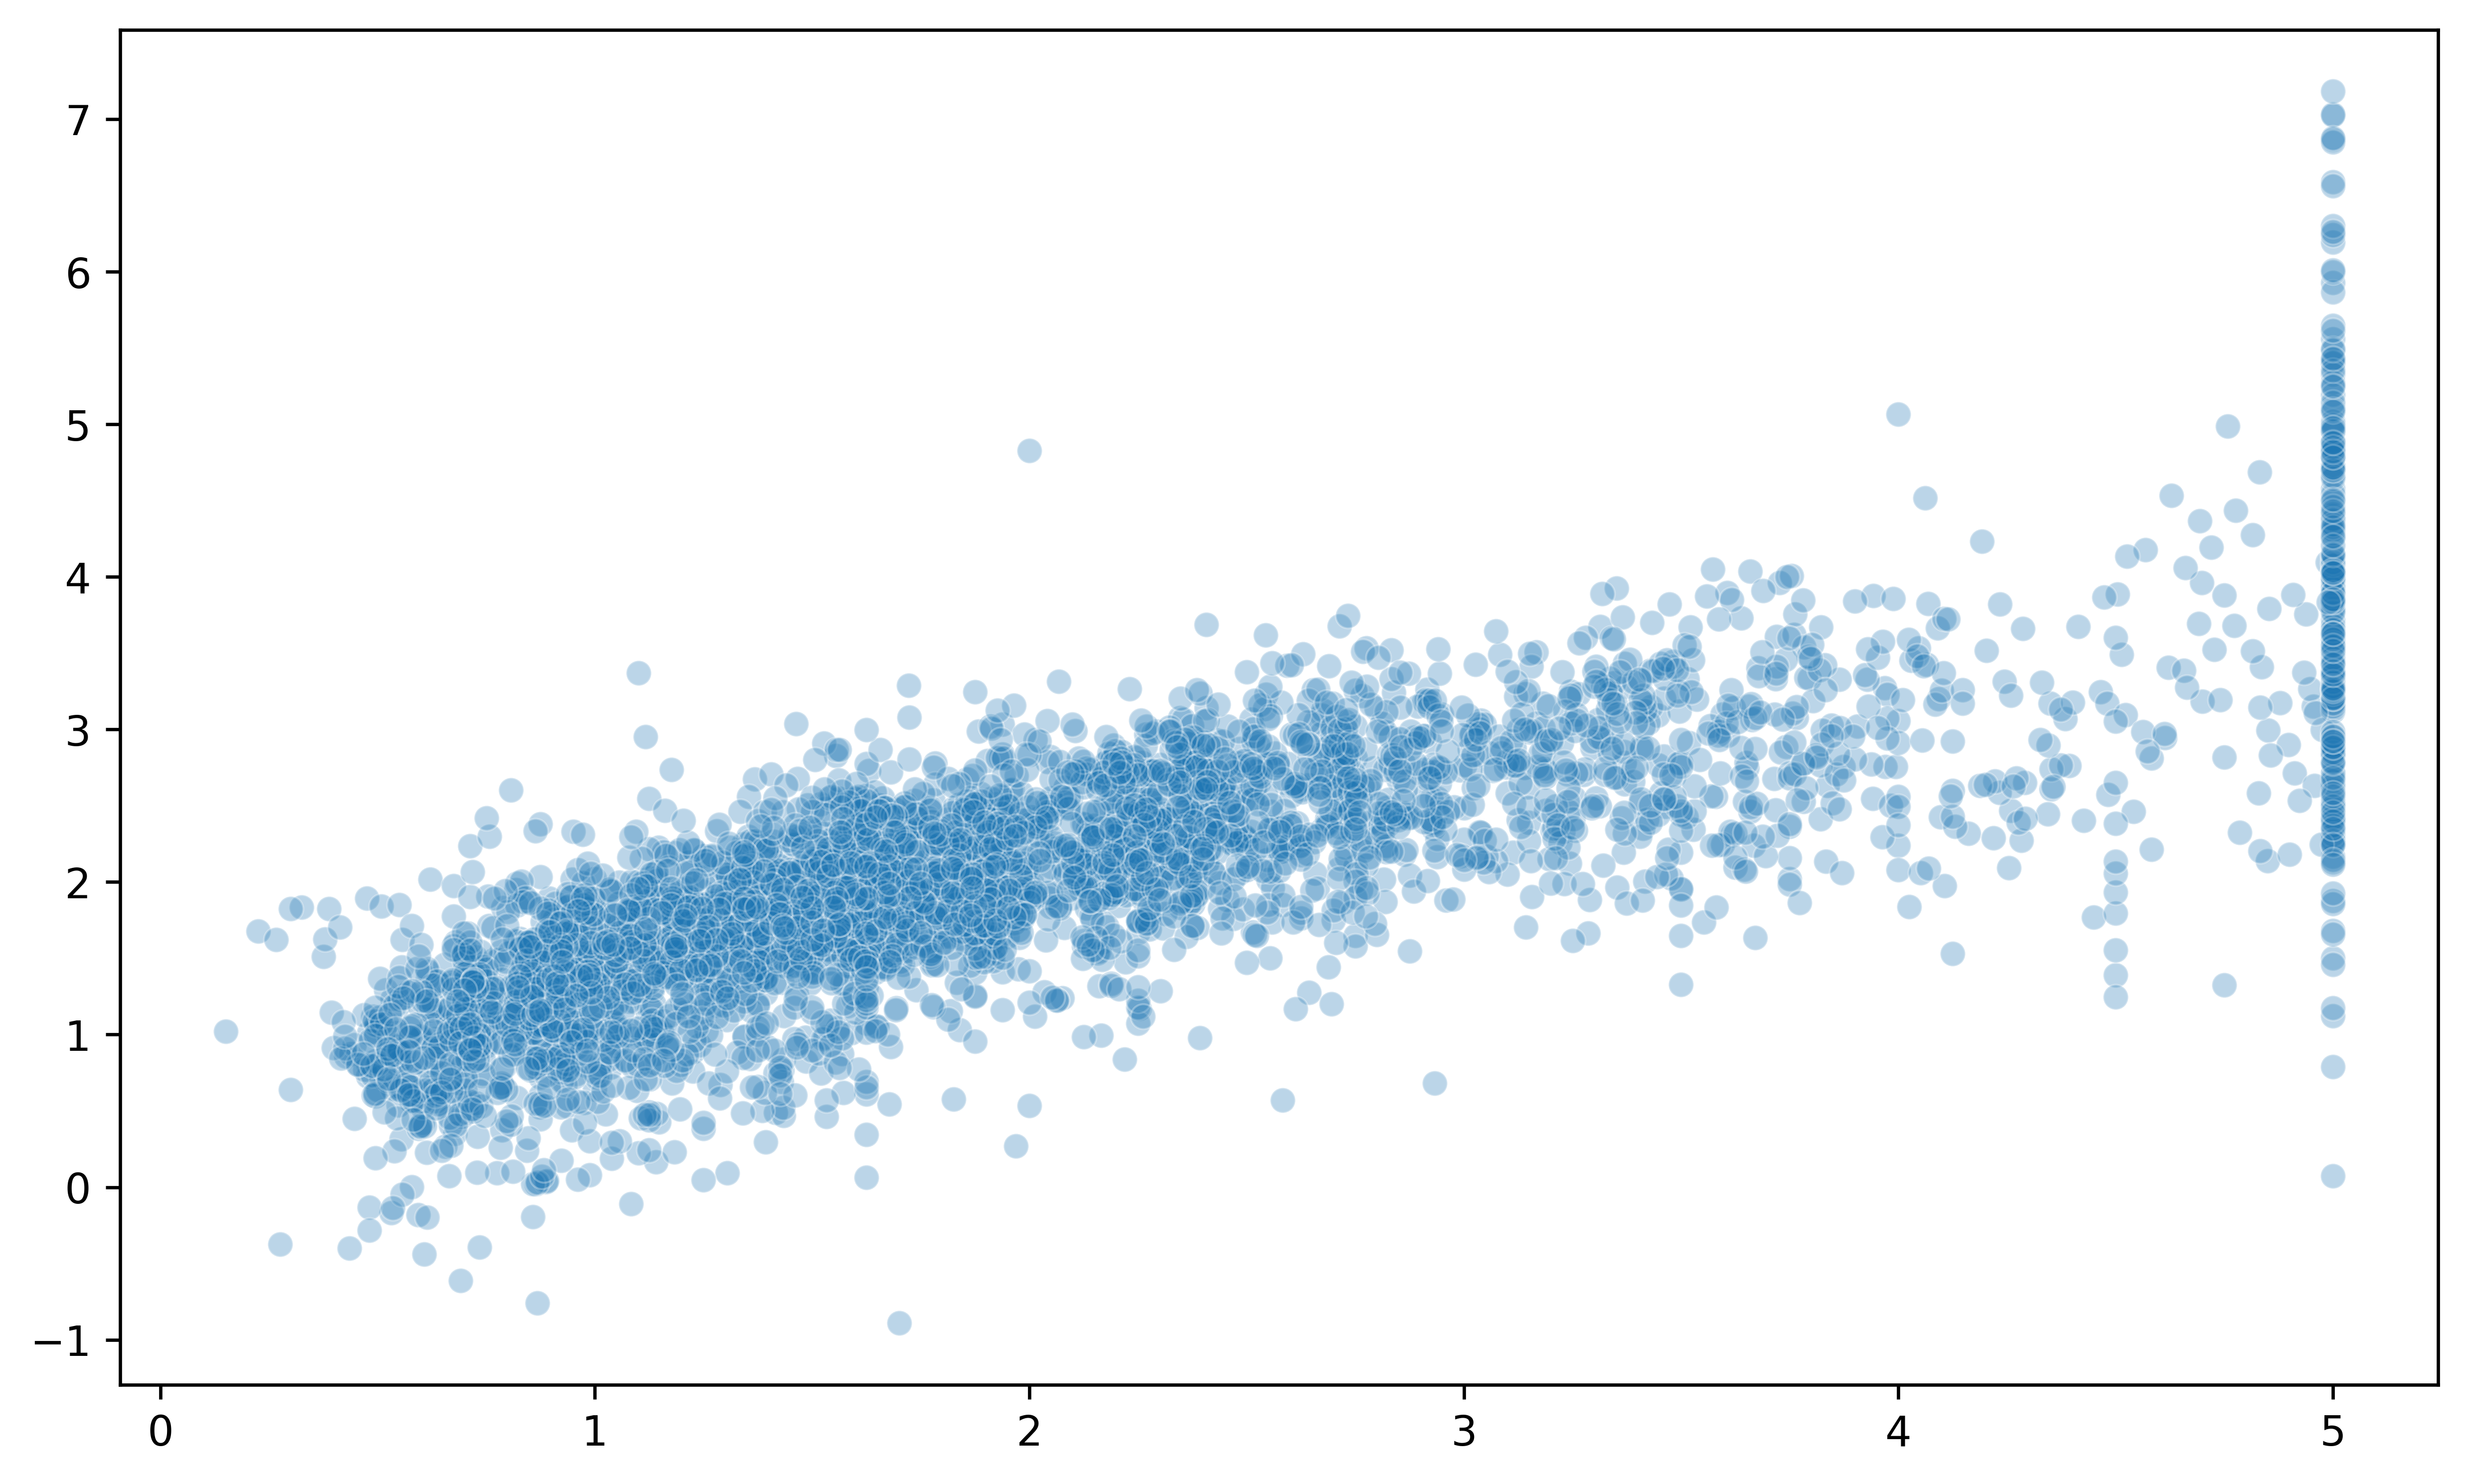

In [14]:
plt.figure(figsize=(10,6), dpi=600)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3);
# sns.lineplot(x=x_test, y=y_pred)

In [15]:
from mpl_toolkits.mplot3d import Axes3D

## In summary

In [16]:
# Import scikit-learn libraries
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset + create X and y data matrices
X,y = fetch_california_housing(return_X_y=True)

# TrainTest split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Multiple Regression model
'''
1. Define the regression model
2. Build linear regression
3. Apply linear regression to make prediction (on test set)
'''
model = linear_model.LinearRegression() # step 1
model.fit(X_train, y_train) # step 2
y_pred = model.predict(X_test) # step 3

# Print results
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'% mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'% r2_score(y_test, y_pred))

Coefficients: [ 4.33976164e-01  9.57585602e-03 -1.04679041e-01  6.32825397e-01
 -1.67837125e-06 -4.09924238e-03 -4.25020352e-01 -4.38510662e-01]
Intercept: -37.28522969875098
Mean squared error (MSE): 0.53
Coefficient of determination (R^2): 0.60


## 3-D Multiple Regression example graph
_**Retrieved from the following GitHub:**_

https://gist.github.com/aricooperdavis/c658fc1c5d9bdc5b50ec94602328073b

MAE: 335.95036378018085
RMSE: 403.23465534477134
Equation: y = -1185.18 + 60.14x1 + 60.04x2


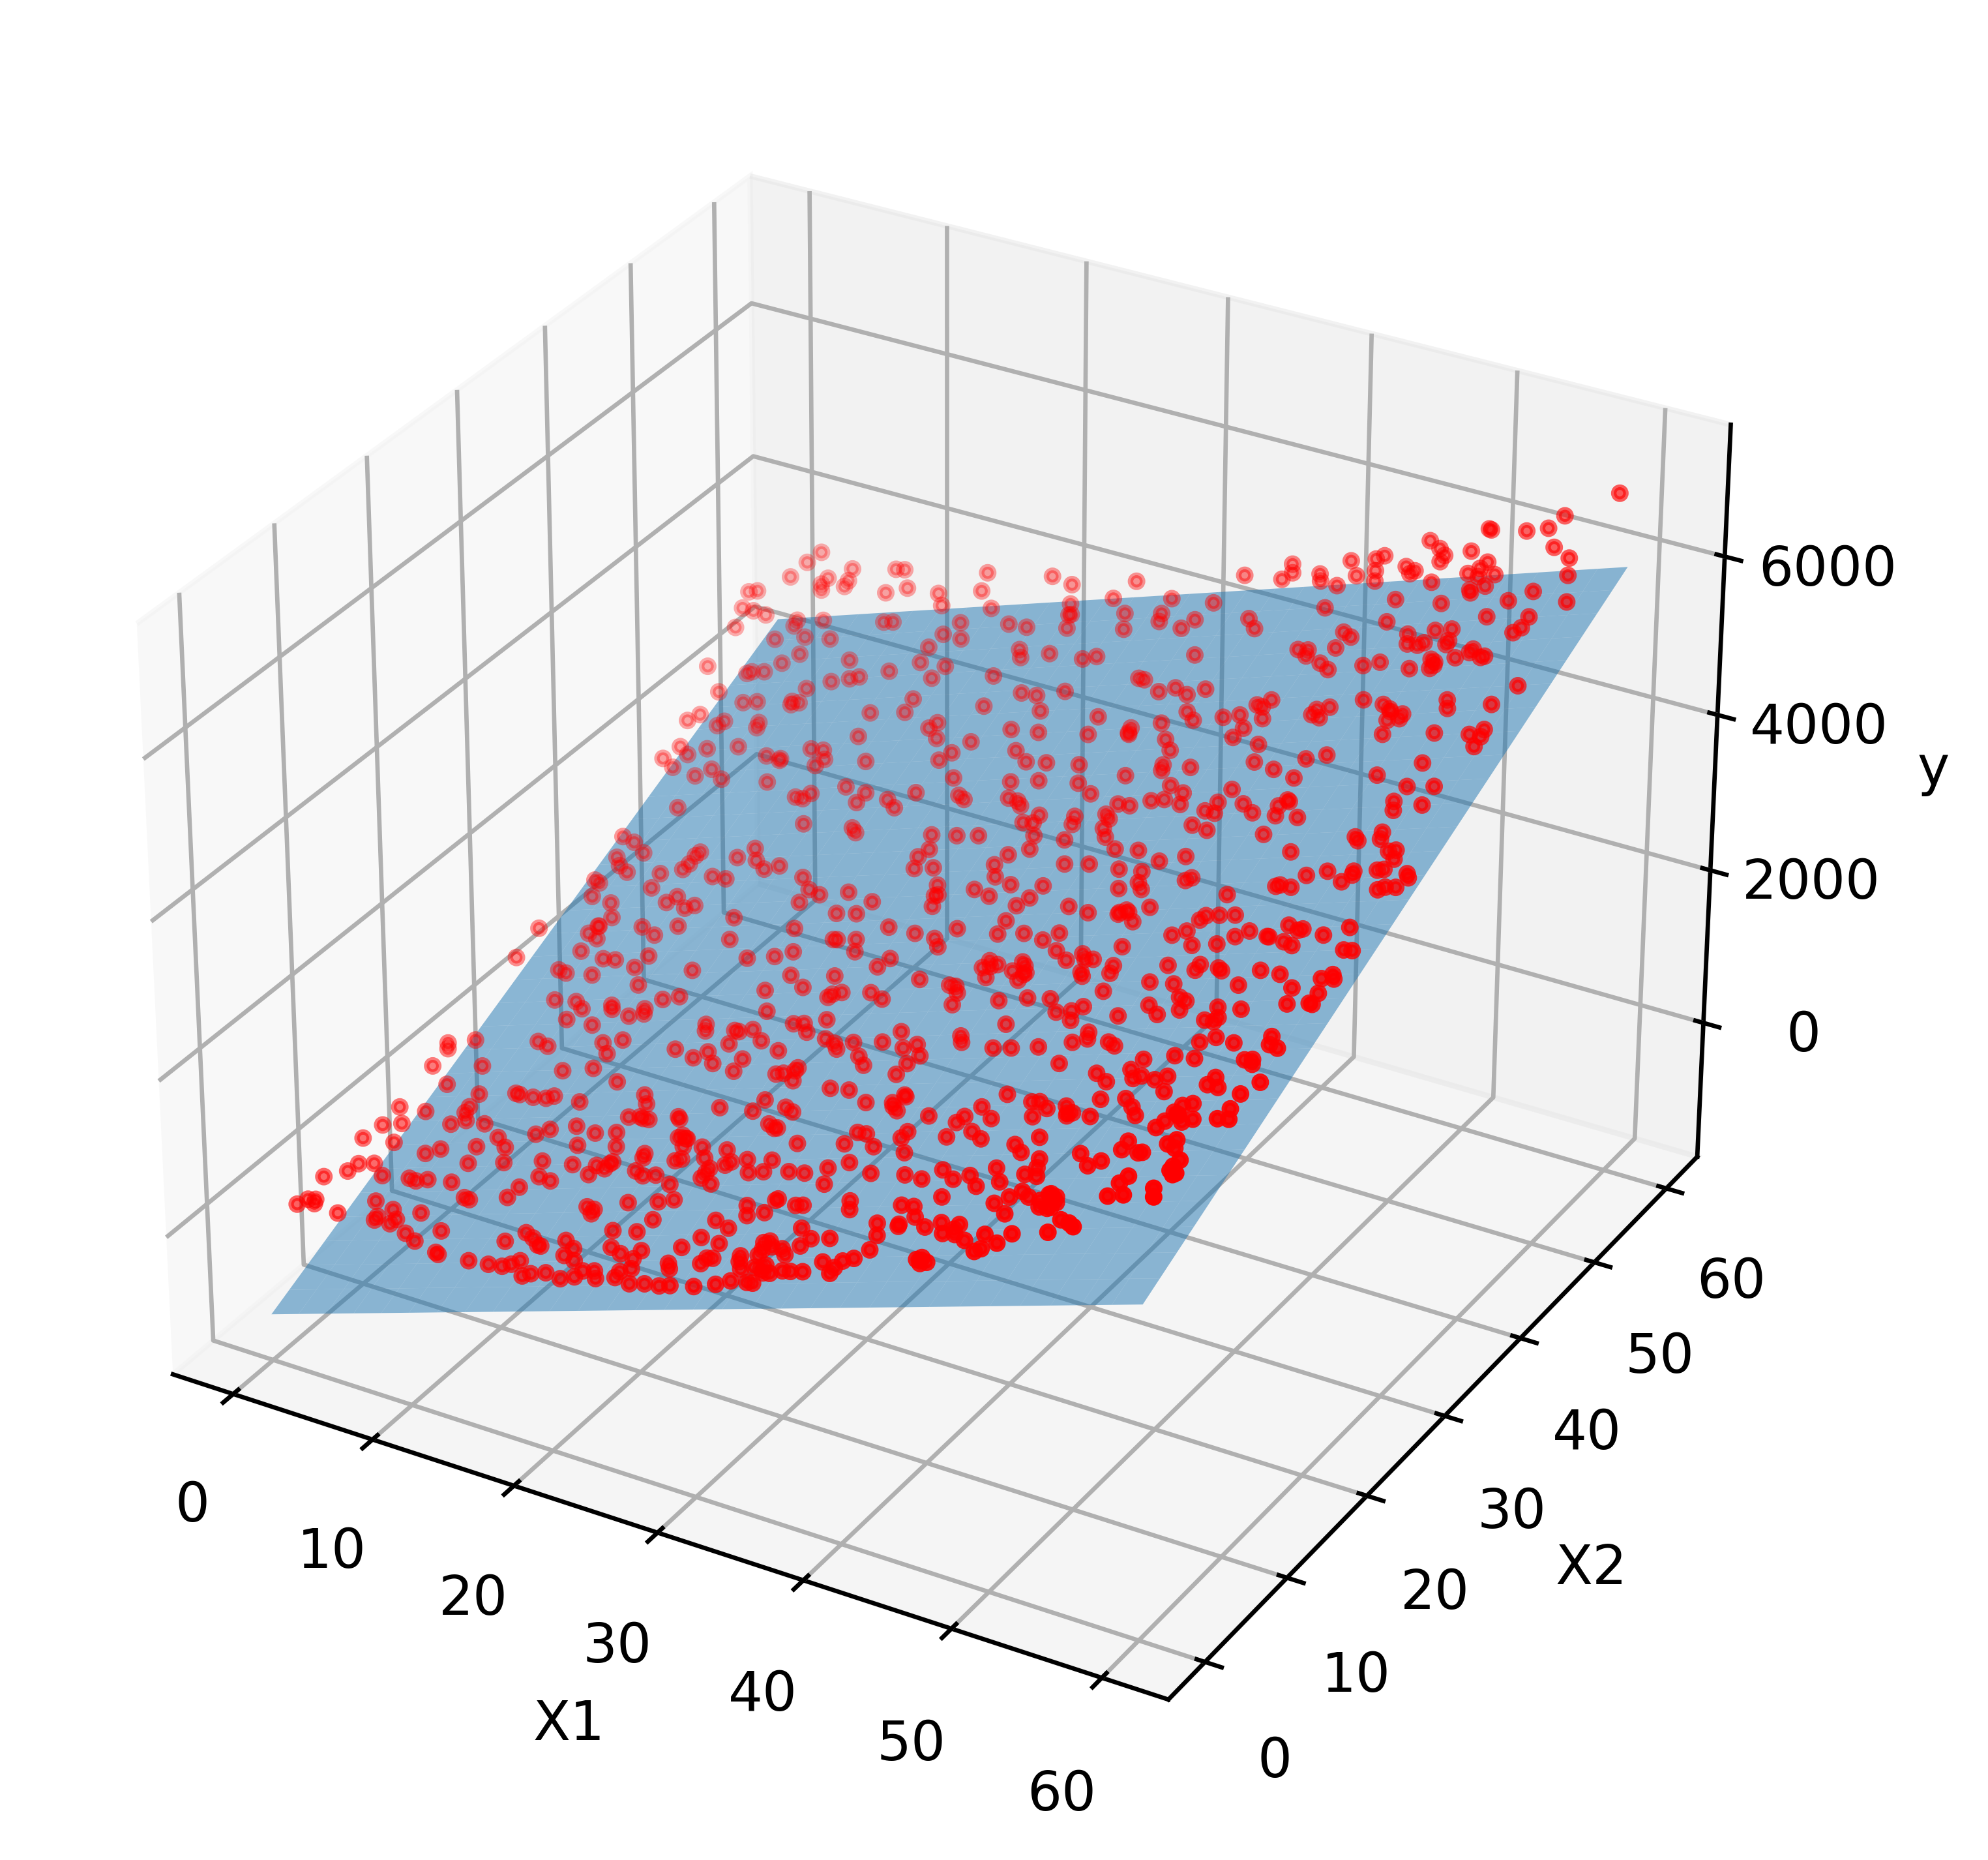

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model

from mpl_toolkits.mplot3d import Axes3D

X_train = np.random.rand(2000).reshape(1000,2)*60
y_train = (X_train[:, 0]**2)+(X_train[:, 1]**2)
X_test = np.random.rand(200).reshape(100,2)*60
y_test = (X_test[:, 0]**2)+(X_test[:, 1]**2)

fig = plt.figure(figsize=(10,6), dpi=600)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train, marker='.', color='red')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")

model = sklearn.linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MAE: {}".format(np.abs(y_test-y_pred).mean()))
print("RMSE: {}".format(np.sqrt(((y_test-y_pred)**2).mean())))

coefs = model.coef_
intercept = model.intercept_
xs = np.tile(np.arange(61), (61,1))
ys = np.tile(np.arange(61), (61,1)).T
zs = xs*coefs[0]+ys*coefs[1]+intercept
print("Equation: y = {:.2f} + {:.2f}x1 + {:.2f}x2".format(intercept, coefs[0],
                                                          coefs[1]))

ax.plot_surface(xs,ys,zs, alpha=0.5)
plt.show()